In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, DBSCAN

# Предобработка и подготовка данных

In [123]:
df = pd.read_csv('city_united.csv') # импортируем датасет
df.head()

,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,...,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,Quality of Life Index
0,Adelaide,Australia,Oceania,6.3095,4.692,3.1365,2.640,1.7765,5.33625,9.399667,...,7.936667,5.1420,8.33075,6.0695,4.5885,4.3410,4.3285,7.8220,5.5310,200.03
1,Raleigh,North Carolina,North America,6.1285,5.610,5.4970,5.157,1.7570,4.78425,8.671000,...,6.677333,7.1165,8.58375,6.5145,4.0620,7.9515,6.6130,7.5620,3.3905,197.30
2,Zurich,Switzerland,Europe,1.4730,1.000,6.2035,3.872,7.7335,5.83950,8.888000,...,7.670333,7.2875,8.64300,6.5520,6.4285,7.2675,4.9655,8.7845,5.4010,194.41
3,Wellington,New Zealand,Oceania,5.1345,5.161,2.4715,1.753,0.8525,6.03975,10.000000,...,8.078333,4.7560,9.60925,5.5055,5.9315,5.1745,4.5990,8.1160,6.3970,193.89
4,Charlotte,North Carolina,North America,5.5490,4.987,6.2480,2.878,3.6790,4.13400,8.671000,...,6.432333,3.6245,8.00925,6.5145,4.0620,6.3870,5.6060,6.7895,1.3115,193.30


In [124]:
df.info() # как видим, только первые три признака относятся к типу данных object, остальные - числа с плавающей точкой

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UA_Name                187 non-null    object 
 1   UA_Country             187 non-null    object 
 2   UA_Continent           187 non-null    object 
 3   Housing                187 non-null    float64
 4   Cost of Living         187 non-null    float64
 5   Startups               187 non-null    float64
 6   Venture Capital        187 non-null    float64
 7   Travel Connectivity    187 non-null    float64
 8   Commute                187 non-null    float64
 9   Business Freedom       187 non-null    float64
 10  Safety                 187 non-null    float64
 11  Healthcare             187 non-null    float64
 12  Education              187 non-null    float64
 13  Environmental Quality  187 non-null    float64
 14  Economy                187 non-null    float64
 15  Taxati

In [125]:
df.shape # 187 строк и 21 столбец

(187, 21)

In [126]:
df.isnull().any() # пропусков данных нет

UA_Name                  False
UA_Country               False
UA_Continent             False
Housing                  False
Cost of Living           False
Startups                 False
Venture Capital          False
Travel Connectivity      False
Commute                  False
Business Freedom         False
Safety                   False
Healthcare               False
Education                False
Environmental Quality    False
Economy                  False
Taxation                 False
Internet Access          False
Leisure & Culture        False
Tolerance                False
Outdoors                 False
Quality of Life Index    False
dtype: bool

## Сводная статистика по количественным признакам

In [127]:
df.describe()

# Большинство количественных признаков имеют максимальное значение 10 (близки к реальному максимуму значений индексов)
# Средние значения индексов колеблются около середины интервала (около 5)
# Также важно отметить, что среди факторов нет значений, выпадающих из интервала от 0 до 10 (уникальные значения не проверяем)

,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,Quality of Life Index
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,6.495746,6.229401,5.290508,3.309412,3.599040,4.866551,7.351622,6.882995,6.713970,3.958158,5.921802,5.129420,5.137540,5.262578,6.236850,6.667652,4.705142,141.552995
std,2.379285,2.122468,2.080873,2.632871,2.071882,1.065340,1.938925,1.768298,1.363514,2.298448,2.116146,1.481395,1.727538,1.857796,1.836031,1.762681,1.547604,35.340590
min,0.000000,0.000000,0.000000,0.000000,0.814500,0.000000,1.000000,1.343500,2.862333,0.000000,1.000000,0.000000,1.426000,1.000000,0.000000,1.406000,0.500000,35.220000
25%,5.214000,4.974500,3.784250,1.557000,1.905000,4.512375,5.763000,5.972750,6.029167,2.090500,4.331875,4.103000,4.062000,4.215750,4.961250,5.737250,4.053000,116.795000
50%,6.555000,5.882000,4.937500,2.870000,3.149500,5.084500,8.345667,7.134500,6.681000,4.280500,6.215750,5.438000,4.772000,5.418500,6.338500,7.030000,4.978000,148.590000
75%,8.438250,7.951500,6.321500,4.579500,4.784500,5.524625,8.836667,8.146000,7.997167,5.383750,7.698500,6.514500,6.038750,6.329750,7.379250,7.931500,5.650500,169.600000
max,10.000000,10.000000,10.000000,10.000000,10.000000,6.295500,10.000000,10.000000,8.916333,9.711000,9.609250,9.390000,10.000000,9.716000,10.000000,9.710000,7.933000,200.030000


## Сводная статистика по категориальным признакам

In [128]:
df.describe(include = 'O')

# не все имена уникальные, есть три имени, упоминаемых дважды
# Наиболее популярная страна в данной выборке - Канада (10 респондентов оттуда)
# Однако, большинство респондентов из Европы - 74 из 187

,UA_Name,UA_Country,UA_Continent
count,187,187,187
unique,184,111,6
top,San Jose,Canada,Europe
freq,2,10,74


## Удаление ненужных показателей

In [129]:
df = df.drop(columns = ['Quality of Life Index'], axis = 1) # удалим целевой показатель

In [130]:
df = df.drop(columns = ['UA_Name'], axis = 1) # удалим показатели типа object, так как они не несут смысловой нагрузки
df = df.drop(columns = ['UA_Country'], axis = 1)
df = df.drop(columns = ['UA_Continent'], axis = 1)

In [131]:
df.info() # осталось 17 однотипных показателей

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Housing                187 non-null    float64
 1   Cost of Living         187 non-null    float64
 2   Startups               187 non-null    float64
 3   Venture Capital        187 non-null    float64
 4   Travel Connectivity    187 non-null    float64
 5   Commute                187 non-null    float64
 6   Business Freedom       187 non-null    float64
 7   Safety                 187 non-null    float64
 8   Healthcare             187 non-null    float64
 9   Education              187 non-null    float64
 10  Environmental Quality  187 non-null    float64
 11  Economy                187 non-null    float64
 12  Taxation               187 non-null    float64
 13  Internet Access        187 non-null    float64
 14  Leisure & Culture      187 non-null    float64
 15  Tolera

# Кластеризация

## Иерархический кластерный анализ

In [132]:
X = [[] for i in range(df.shape[0])] # представим наш датафрейм построчно в виде списка списков
for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        X[i].append(df.iloc[i][j])

In [133]:
# расстояние между кластерами - Варда, расстояние между парой объектов - евклидово
clustering1 = AgglomerativeClustering(affinity = 'euclidean', linkage = 'ward').fit_predict(X) # предскажем кластеры
df["cluster"] = clustering1
df.head()

,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,cluster
0,6.3095,4.692,3.1365,2.640,1.7765,5.33625,9.399667,7.9260,7.936667,5.1420,8.33075,6.0695,4.5885,4.3410,4.3285,7.8220,5.5310,0
1,6.1285,5.610,5.4970,5.157,1.7570,4.78425,8.671000,6.5225,6.677333,7.1165,8.58375,6.5145,4.0620,7.9515,6.6130,7.5620,3.3905,0
2,1.4730,1.000,6.2035,3.872,7.7335,5.83950,8.888000,9.0665,7.670333,7.2875,8.64300,6.5520,6.4285,7.2675,4.9655,8.7845,5.4010,0
3,5.1345,5.161,2.4715,1.753,0.8525,6.03975,10.000000,8.2230,8.078333,4.7560,9.60925,5.5055,5.9315,5.1745,4.5990,8.1160,6.3970,0
4,5.5490,4.987,6.2480,2.878,3.6790,4.13400,8.671000,5.3475,6.432333,3.6245,8.00925,6.5145,4.0620,6.3870,5.6060,6.7895,1.3115,0


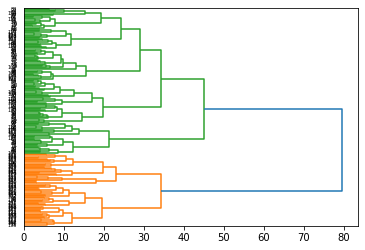

In [134]:
# представим кластеры на дендрограмме
dendrogram(linkage(X, metric  = 'euclidean', method = 'ward'),
          orientation = 'right')
plt.show()

In [135]:
Y = [[] for i in range(df.shape[1])] # транспонируем массив X - получим список списков, где указаны все значения конкретного признака
for j in range(df.shape[1]):
    for i in range(df.shape[0]):
        Y[j].append(df.iloc[i][j])
Y = Y[:-1] # удалим из массива Y последний список, он отражает сами кластеры

In [136]:
X_0, X_1 = [], [] # разделим массив X на кластеры, в одном будут строки, относящиеся к первому кластеру, в другом - ко второму
for i in range(df.shape[0]):
    if df['cluster'].iloc[i] == 0:
        X_0.append(X[i])
    else:
        X_1.append(X[i])

In [137]:
Y_0 = [[] for i in range(df.shape[1] - 1)]
Y_1 = [[] for i in range(df.shape[1] - 1)]
for j in range(len(X_0[0])):
    for i in range(len(X_0)):
        Y_0[j].append(X_0[i][j])
for j in range(len(X_1[0])):
    for i in range(len(X_1)):
        Y_1[j].append(X_1[i][j])

In [138]:
averages_comparison_array = [[] for i in range(len(Y_0))]
for i in range(len(Y)):
    averages_comparison_array[i].append(sum(Y_0[i]) / len(Y_0[i]))
for j in range(len(Y)):
    averages_comparison_array[j].append(sum(Y_1[j]) / len(Y_1[j]))
averages_comparison_array

[[5.394148, 8.716709677419356],
 [5.116264000000001, 8.473629032258065],
 [5.588188000000001, 4.690346774193549],
 [3.930040000000001, 2.058145161290323],
 [3.9409919999999974, 2.909620967741935],
 [4.954360000000001, 4.689516129032259],
 [8.459440000000003, 5.118118279569891],
 [6.7876759999999985, 7.0751693548387085],
 [7.265056000000001, 5.6029086021505385],
 [5.167756000000003, 1.519451612903226],
 [7.028986000000002, 3.689576612903226],
 [5.795391999999998, 3.7867338709677423],
 [5.025060000000001, 5.364314516129034],
 [5.977127999999999, 3.8219516129032263],
 [6.280024000000001, 6.149806451612903],
 [7.061335999999999, 5.873935483870968],
 [4.8310200000000005, 4.451354838709677]]

In [139]:
itog_massive = []
for i in range(len(averages_comparison_array)):
    itog_massive.append(abs(averages_comparison_array[i][1] - averages_comparison_array[i][0]))
criterion = sum(itog_massive)
criterion

29.224926182795706

## Кластеризация методом k средних

In [140]:
df = df.drop(columns = ['cluster'], axis = 1) # удалим предыдущее разделение на кластеры
clustering2 = KMeans(n_clusters = 2, random_state = 0).fit_predict(X) # предскажем кластеры
df["cluster"] = clustering2
df.head()

C:\Users\nikit\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,cluster
0,6.3095,4.692,3.1365,2.640,1.7765,5.33625,9.399667,7.9260,7.936667,5.1420,8.33075,6.0695,4.5885,4.3410,4.3285,7.8220,5.5310,1
1,6.1285,5.610,5.4970,5.157,1.7570,4.78425,8.671000,6.5225,6.677333,7.1165,8.58375,6.5145,4.0620,7.9515,6.6130,7.5620,3.3905,1
2,1.4730,1.000,6.2035,3.872,7.7335,5.83950,8.888000,9.0665,7.670333,7.2875,8.64300,6.5520,6.4285,7.2675,4.9655,8.7845,5.4010,1
3,5.1345,5.161,2.4715,1.753,0.8525,6.03975,10.000000,8.2230,8.078333,4.7560,9.60925,5.5055,5.9315,5.1745,4.5990,8.1160,6.3970,1
4,5.5490,4.987,6.2480,2.878,3.6790,4.13400,8.671000,5.3475,6.432333,3.6245,8.00925,6.5145,4.0620,6.3870,5.6060,6.7895,1.3115,1


C:\Users\nikit\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\nikit\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\nikit\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\nikit\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Wi

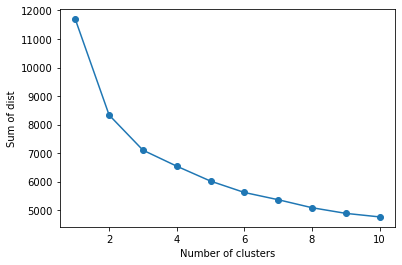

In [141]:
# Построение каменистой осыпи для оценки количества кластеров
K = range(1, 11)
models = [KMeans(n_clusters = i).fit(X) for i in K]
dist = [model.inertia_ for model in models]
plt.plot(K, dist, marker = "o")
plt.xlabel("Number of clusters")
plt.ylabel("Sum of dist")
plt.show()

In [142]:
X_0, X_1 = [], [] # разделим массив X на кластеры, в одном будут строки, относящиеся к первому кластеру, в другом - ко второму
for i in range(df.shape[0]):
    if df['cluster'].iloc[i] == 0:
        X_0.append(X[i])
    else:
        X_1.append(X[i])

In [143]:
Y_0 = [[] for i in range(df.shape[1] - 1)]
Y_1 = [[] for i in range(df.shape[1] - 1)]
for j in range(len(X_0[0])):
    for i in range(len(X_0)):
        Y_0[j].append(X_0[i][j])
for j in range(len(X_1[0])):
    for i in range(len(X_1)):
        Y_1[j].append(X_1[i][j])

In [144]:
averages_comparison_array = [[] for i in range(len(Y_0))]
for i in range(len(Y)):
    averages_comparison_array[i].append(sum(Y_0[i]) / len(Y_0[i]))
for j in range(len(Y)):
    averages_comparison_array[j].append(sum(Y_1[j]) / len(Y_1[j]))
averages_comparison_array

[[8.66591911764706, 5.255647058823529],
 [8.418014705882351, 4.978764705882354],
 [4.605169117647058, 5.682130252100841],
 [1.7539117647058824, 4.198268907563026],
 [2.834117647058824, 4.0361386554621825],
 [4.7595882352941175, 4.927672268907565],
 [5.2955588235294115, 8.526515406162469],
 [7.231779411764705, 6.683689075630252],
 [5.702431372549019, 7.291991596638656],
 [1.6353602941176475, 5.285470588235296],
 [3.9736029411764697, 7.035058823529415],
 [3.88997794117647, 5.837672268907561],
 [5.544514705882355, 4.904983193277313],
 [4.027139705882355, 5.9685420168067225],
 [6.169588235294116, 6.275285714285714],
 [5.9093970588235285, 7.100941176470588],
 [4.4652279411764715, 4.842235294117647]]

In [145]:
itog_massive = []
for i in range(len(averages_comparison_array)):
    itog_massive.append(abs(averages_comparison_array[i][1] - averages_comparison_array[i][0]))
criterion = sum(itog_massive)
criterion

30.023995798319334

## Кластеризация методом DBSCAN

In [146]:
df = df.drop(columns = ['cluster'], axis = 1) # удалим предыдущее разделение на кластеры
clustering3 = DBSCAN(eps = 0.3, min_samples = 3).fit_predict(X)
df['cluster'] = clustering3
df.head()

,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,cluster
0,6.3095,4.692,3.1365,2.640,1.7765,5.33625,9.399667,7.9260,7.936667,5.1420,8.33075,6.0695,4.5885,4.3410,4.3285,7.8220,5.5310,-1
1,6.1285,5.610,5.4970,5.157,1.7570,4.78425,8.671000,6.5225,6.677333,7.1165,8.58375,6.5145,4.0620,7.9515,6.6130,7.5620,3.3905,-1
2,1.4730,1.000,6.2035,3.872,7.7335,5.83950,8.888000,9.0665,7.670333,7.2875,8.64300,6.5520,6.4285,7.2675,4.9655,8.7845,5.4010,-1
3,5.1345,5.161,2.4715,1.753,0.8525,6.03975,10.000000,8.2230,8.078333,4.7560,9.60925,5.5055,5.9315,5.1745,4.5990,8.1160,6.3970,-1
4,5.5490,4.987,6.2480,2.878,3.6790,4.13400,8.671000,5.3475,6.432333,3.6245,8.00925,6.5145,4.0620,6.3870,5.6060,6.7895,1.3115,-1


In [147]:
df['cluster'].unique() # странно, кластер всего один

array([-1], dtype=int64)

# Выводы

Так как в третьем методе получился всего один кластер, учитывать его не будем

Чтобы сравнить качество кластеризации по первым двум методам, посмотрим на сумму разностей средних значений по каждому признаку по двум кластерам

В первом методе этот итоговый критерий равен примерно 29,22, во втором - 30,02

Так как во втором методе критерий больше - кластеризация более качественная

Таким образом, кластеризация методом k средних оказалась наиболее эффективной, но иерархический кластерный анализ тоже дал неплохие результаты